# Lec 7-9: Array Programming Paradigm: The Basic


Jianwen Zhu <jzhu@eecg.toronto.edu>
v2.0, 2024-09


## Agenda
------

* Array Programming Paradigm
* NumPy
* Array as collection
* Elementwise operations
* Reduction


## Array Programming Language
--------------------------

* Native sequences are nice
 - But very general: element can be anything
 - Slow for large scale data and numerical computation
 
* Array Programming Paradigm
  - Everything is an array
  - No loops! (we already saw list comprehension)
  
* APL (A Programming Language)
  - Kenneth E. Iverson: Candian Computer Scientist
  - Turing Speech: "Notations as a Tool of Thoughts"
     (one of the most inspiring talks in CS)
  - Influenced spreadsheets, functional programming, and
    computer math packages

* Vector machine
  - Vector Machine
  - Each register is an array
  - Instructions operate on arrays
  - Seymour Cray: Father of Supercomputer

* Modern Incarnation
    - Tensor
    - From Descrete Objects to Tensor

* Question: How to
    - Combine performance of C
    - Expressive Power of APL
    - Python as a language substrate

* NumPy: Multidimensional arrays!
    - Vector / Matrix
    - Photos
    - Tensors



## NumPy Package
-------------

### Installing from Source (Really Ancient Way)
* Retrieving source

~~~
>wget url
~~~

* Unpack

~~~
>tar xvfz foo.tar.gz
~~~

* Installation
 - setup.py

~~~
>python setup.py build
>python setup.py install --user
~~~

* Ready to import

### Installing Using a Package Manager
~~~
%pip install numpy
~~~

Below code is a bit more cumbersome than usual. This is because
we want to install within the Jupyter Environment (the kernel
is running from a virtual environment, and we want to make
sure we are using the same python as the Jupter kernel.)

In [ ]:
import sys
!{sys.executable} -m pip install numpy

In [ ]:
import numpy as np

## NumPy Type: ndarray
-------------------

* Rank
    - Number of dimensions
 
* Axis
    - Each dimension

* Shape
    - tuple of integers indicating the size of the array in each dimension

* accessors
    - a.ndim: rank
    - a.shape: shape
    - a.size: total number of elements (prod of all elements of shape)
    - a.itemsize: number of bytes for each elements
    - a.dtype: data type of each element
    - a.data: actual data (do not use directly)

In [ ]:
from numpy  import *
a = arange(10).reshape(2,5)
a

In [ ]:
a.shape

In [ ]:
a.ndim

In [ ]:
a.dtype

In [ ]:
a.itemsize

In [ ]:
a.size

## array Constructor function

### Convert from sequences


In [ ]:
import numpy as np
a = np.array( [2,3,4] )

In [ ]:
a

In [ ]:
a.dtype

In [ ]:
b = np.array([1.2, 3.5, 5.1])

In [ ]:
b.dtype

### Or sequences of sequences ...

In [ ]:
b = np.array( [ (1.5,2,3), (4,5,6) ] )
b

### zeros/ones/empty construction

In [ ]:
np.zeros( (3,4) )

In [ ]:
np.ones( (2,3,4), dtype=int16 ) 

In [ ]:
np.empty( (2,3) )

### arange

recall range function ?


In [ ]:
np.arange( 10, 30, 5 )

In [ ]:
np.arange( 0, 2, 0.3 )                 # it accepts float arguments

### linspace

It is NOT always convenient to use arange as it cannot control the number of elements directly. But we have alternatives that can give predictable number of elements.

In [ ]:
np.linspace( 0, 2, 9 ) 

In [ ]:
pi = 3.14
x = np.linspace( 0, 2*pi, 100 )

In [ ]:
f = np.sin(x)
f

In [ ]:
import sys
!{sys.executable} -m pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

plt.plot( x, f )

### random


In [ ]:
np.random.random((2,3))

## Changing Shape

* Ravel

In [ ]:
a = np.array([[ 7.,  5.,  9.,  3.],
       [ 7.,  2.,  7.,  8.],
       [ 6.,  8.,  3.,  2.]])
a.ravel() # flatten the array

In [ ]:
a.shape = (6, 2)
a

In [ ]:
b = a.transpose()
b

## resize
   - modify the array in place

In [ ]:
a.resize((2,6))

## reshape
  - returns another array with changed shape
  - -1 means the dimension is automatically calculated according to other
    dimensions

In [ ]:
a.reshape(3,-1)

## Enumeration
* Hierarchical

In [ ]:
b = np.array( [[ 1, 2, 3], [4, 5, 6]] )
for element in b : 
    print( element )

* Flat

In [ ]:
for element in b.flat :
    print( element )

## Indexing and Slicing

### Just like list

In [ ]:
import numpy as np

a = np.array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])
a[2]

In [ ]:
a[2:5]

In [ ]:
a[:6:2]

In [ ]:
a[:6:2] = -1000   
a

In [ ]:
a[::-1]     

### Tuple Indexed (NOT Like List)

In [ ]:
b = np.array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [ ]:
b[2,3]

In [ ]:
b[:,1]     

We are asking for ALL rows, and column 1, do shape analysis

Note that we have dimension reduction, just like a regular index. But we dont have to!

In [ ]:
 b[1:3,:]  # row1/2, all columns

### Missing Indices

In [ ]:
b[-1]            # the last row, do shape analysis again

* Dots (...)
  - Means: as many as :
  - x[1,2,...] is equivalent to x[1,2,:,:,:],
  - x[...,3] to x[:,:,:,:,3] and
  - x[4,...,5,:] to x[4,:,:,5,:].
  - Key of understanding: Shape Analysis in your brain (just like type analysis)

In [ ]:
c = np.array( [ [[  0,  1,  2],               # a 3d array (two stacked 2d arrays)
           [ 10, 12, 13]],
           [[100,101,102],
           [110,112,113]] ] )

In [ ]:
c.shape

In [ ]:
c[:,0,:]

In [ ]:
c[1,...]   # matrix 1 (full)

In [ ]:
c[...,2]  # taking colum 2 of all

## Elementwise Functions

* So far similar to list
  - Seems just a convenience
  - Maybe more efficient in storage
  - But why bother?

  - compare

~~~
for i in range(len(a)) :
  c[i] = a[i] + b[i]
~~~

~~~
[ x + y for x, y in zip(a,b)]
~~~

But How about simply this!
~~~
a + b
~~~


* array op array
  - vector operation just like scalar operation
  - no loops
  - not even list comprehension


In [ ]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
print( b )
c = a-b
c

* array op scalar

In [ ]:
b ** 2

In [ ]:
10 * np.sin(a)

In [ ]:
print(a) 
a < 35

## Univeral Functions

Recall "operators" like "+" are just plain, but "polymorphic" functions.
We can have more such functions, but with names. 

* Unary
    - arccos/arccosh/arcsin/arcsinh/arctan/arctanh
    - cos/cosh/exp/log/log10/sin/sinh/sqrt/tan/tanh
    - ...
    
* Binary
    - add/subtract/multiply/divide
    - remainder
    - power
    - ...

 - Comparison
   - greater/less
   - ...
   

## More Indexing and Slicing

* We saw indexing by
  - integers
  - slices
  - tuple of integers/slices

* Array of integers!
  - Gather operation

In [ ]:
a = np.arange(12)**2                       # the first 12 square numbers
i = np.array( [ 1,1,3,8,5 ] )              # an array of indices
print( a )
print( i )

In [ ]:
a[i]                                       

In [ ]:
palette = np.array( [ [0,0,0],                # black
                  [255,0,0],               # red
                    [0,255,0],              # green
                    [0,0,255],              # blue
                    [255,255,255] ] )       # white


In [ ]:
image = np.array( [ [ 0, 1, 2, 0 ],           # 2x4 image with color index entry
                 [ 0, 3, 4, 0 ]  ] )


In [ ]:
 palette[image]

* Scatter operation
  

In [ ]:
a = np.arange(5)
a

In [ ]:
a[[1,3,4]] = 0
a

In [ ]:
a = np.arange(5)
a[[0,0,2]]=[1,2,3]
a

NOTE: For repeat entries, take the value of last one.

## Array of Booleans (Pack)

In [ ]:
import numpy as np

a = np.arange(12).reshape(3,4)
print( a )
b = a > 4
b                                          # b is a boolean with a's shape


In [ ]:
a[b]   # 1d array with the selected elements

In [ ]:
a[b] = 0     # All elements of 'a' higher than 4 become 0

In [ ]:
a

Question: We have seen how elementwise operation help eliminate
loops in code -- what procedural construct does pack help eliminate? 

## Fractal Example

*  Mandelbrot set
    - Given a complex number z, make a copy of the number (call it c),
      and then perform the following operation recursively:

~~~      
    z = z**2 + c
~~~

* May go to infinity - Refinement:

  - Any point z which, after N (let's say 100) iterations, has a magnitude not exceeding a threshold (let's say 10), belongs to the Mandelbrot set.

  - The iteration that make z exceeding 10, defines the "escape speed"

* Visualization: We know that a complex number is a point in a two-demensinoal space, so it maps well to an image.

* Your challenge: Use as LITTLE control (imperative) statements as possible!


* We have already seen how to construct a 1D axis

In [1]:
import numpy as np
print( np.linspace( 0, 1, num=5 ).dtype )

float64


In [2]:
re = np.linspace( -2.0, 1, 1000 )
im = np.linspace( -1.5, 1.5, 1000 )

Let's construct an 2D grid

In [3]:
a, b = np.meshgrid( [1,2,3], [1,2] )
print( a )
print( b )

[[1 2 3]
 [1 2 3]]
[[1 1 1]
 [2 2 2]]


Repeat the first argument by the size of the second argument;
Repeat the second element by the size of the first argument, but rotated.
They are basically the horizontal and vertical grid lines.

In [4]:
 x, y = np.meshgrid(re, im)

* Complex grid: What is happening below: 

In [5]:
z = x + 1j*y
z.shape

(1000, 1000)

This an ELEMENT-WISE operation applied on equal-shaped matrics. For every respective element in the matrix, we form a complex number. What have we done: We basically enumerated ALL complex points within a square range by a SINGLE expression!

In [7]:
a = np.array( [1, 2, 3] )
b = a[:2]
print( b )
b[0] = 3         #numpy array is mutable
print( b )

[1 2]
[3 2]


In [8]:
print( a )

[3 2 3]


What happend? Changing value of b also changes value of a? 

This is because b is just a "view" of a (implementation choice
by Numpy designer). To create an independent value, have to use
the "copy" method. 

In [10]:
a = np.array( [1, 2, 3] )
b = a[:2].copy()
b[0] = 3
print( b )
print( a )

[3 2]
[1 2 3]


In [ ]:
b = a[:2].copy()
b[0] = 3
print( b )
print( a )

Now let's get back to Mendalbrot Set problem. 

In [ ]:
c = z.copy()
for n in range( 100 ) :
    print( "Iteration %d" % n )
    z *= z
    z += c

Seem all trival and familiar expressions, but remember z is a GRID of scalar complex numbers, and we are performing on each one of them! 

NOTE: *= and += are *in place* operators, they are NOT euivalent to 
z = z * z, and z = z + c.

Now we need to use the DEFINITION of Mandelbrot set, and visualize it using an image.

In [11]:
fractal = np.zeros(z.shape, dtype=np.uint8)

[]

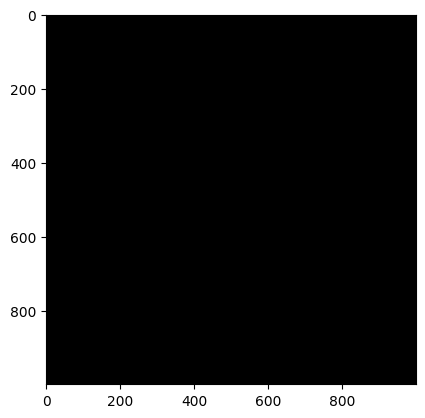

In [12]:
import matplotlib.pyplot as plt

plt.imshow(fractal, cmap='grey')
plt.plot()

This is just all dark, but it is OK as a pixel value is 0. Let's mark the points of Mendelbrot set white. Recall that for any point p in z which, after 100 iterations, has a magnitude (np.abs(p)) of greater than 10, belongs to the Mandelbrot set. Challenge you to get the image use ONE expression!

In [13]:
z = x + 1j*y
c = z.copy()
for n in range( 100 ) :
    print( "Iteration %d" % n )
    z *= z
    z += c
fractal[np.abs(z) <= 10] = 255

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

/tmp/ipykernel_20799/26364443.py:5: RuntimeWarning: overflow encountered in multiply
  z *= z
/tmp/ipykernel_20799/26364443.py:5: RuntimeWarning: invalid value encountered in multiply
  z *= z


[]

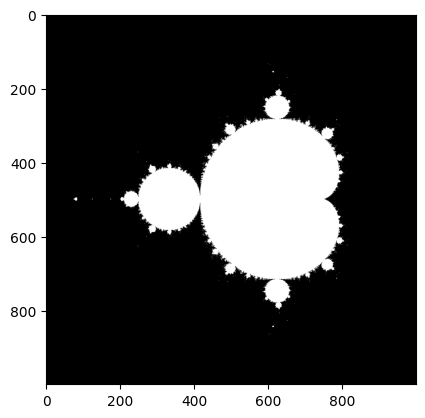

In [14]:
import matplotlib.pyplot as plt

plt.clf()
plt.imshow(fractal, cmap='grey')
plt.plot()

Let's put them all together, and with fancier graphics: we want to use pixel color to indicate the "escape speed", in other words, how soon they "escape" the set,
the earlier, the darker. We will also make the code slightly more general 
by making constants into "hyper-parameters" that can be changed for exploration.

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
Iteration 25
Iteration 26
Iteration 27
Iteration 28
Iteration 29
Iteration 30
Iteration 31
Iteration 32
Iteration 33
Iteration 34
Iteration 35
Iteration 36
Iteration 37
Iteration 38
Iteration 39
Iteration 40
Iteration 41
Iteration 42
Iteration 43
Iteration 44
Iteration 45
Iteration 46
Iteration 47
Iteration 48
Iteration 49
Iteration 50
Iteration 51
Iteration 52
Iteration 53
Iteration 54
Iteration 55
Iteration 56
Iteration 57
Iteration 58
Iteration 59
Iteration 60
Iteration 61
Iteration 62
Iteration 63
Iteration 64
Iteration 65
Iteration 66
Iteration 67
Iteration 68
Iteration 69
Iteration 70
Iteration 71
Iteration 72
Iteration 73
Iteration 74
Iteration 75
Iteration 76
Iteration

/tmp/ipykernel_20799/2913421378.py:27: RuntimeWarning: overflow encountered in multiply
  z *= z
/tmp/ipykernel_20799/2913421378.py:27: RuntimeWarning: invalid value encountered in multiply
  z *= z


Iteration 92
Iteration 93
Iteration 94
Iteration 95
Iteration 96
Iteration 97
Iteration 98
Iteration 99


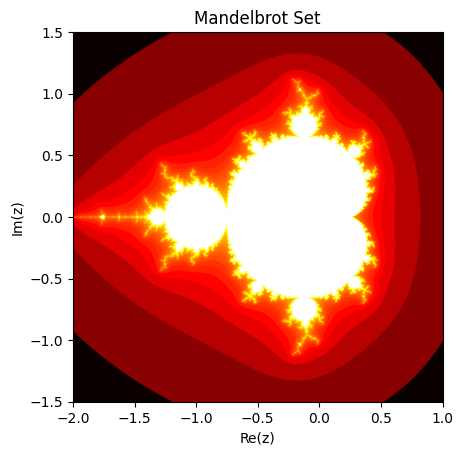

In [15]:
ITERATIONS = 100
DENSITY = 1000 # warning: execution speed decreases with square of DENSITY

x_min, x_max = -2, 1
y_min, y_max = -1.5, 1.5

x, y = np.meshgrid(np.linspace(x_min, x_max, DENSITY),
                   np.linspace(y_min, y_max, DENSITY))

c = x + 1j*y # complex grid
z = c.copy()
fractal = np.zeros(z.shape, dtype=np.uint8) + 255

for n in range(ITERATIONS):
    print( "Iteration %d" % n )

    # --- Uncomment to see different sets ---

    # Tricorn
    #z = z.conj()

    # Burning ship
    # z = abs(z.real) + 1j*abs(z.imag)

    # ---
    # Leave the lines below in place
    z *= z
    z += c

    # first time escape
    mask = (fractal == 255) & (abs(z) > 10)
    # assign with color/hot code
    fractal[mask] = 254 * n / float(ITERATIONS)

plt.imshow(np.log(fractal), cmap=plt.cm.hot,
           extent=(x_min, x_max, y_min, y_max))
plt.title('Mandelbrot Set')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()

Note we use different color map in imshow() function call. The color map basically turns pixel values into real RGB values (remember the palatte exampler earlier?). 

Also note that you can explore different variants of the Mandelbrot set by uncommenting some statements in the code. 

While the images are strickingly beautiful, it is more intriguring to see how the task is accomplished in a DIFFERENT language paradigm. 